In [1]:
# Importing the libaraies necessary
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
import scipy.stats as stats
import os
import re
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Checking the current directory

%pwd

'a:\\Analytix\\python projects\\E commerce project(case study 4)'

In [3]:
# importin the necessary datasets
cust_info = pd.read_csv(r'CUSTOMERS.csv')

seller_info = pd.read_csv(r'SELLERS.csv')

product_info = pd.read_csv(r'PRODUCTS.csv')

order_info = pd.read_csv(r'Orders.csv')

order_item = pd.read_csv(r'ORDER_ITEMS.csv')

payment_info = pd.read_csv(r'ORDER_PAYMENTS.csv')

ratings = pd.read_csv(r'ORDER_REVIEW_RATINGS.csv')

location = pd.read_csv(r'GEO_LOCATION.csv')

### Performimg EDA on the Datasets

#### 1. cust_info 

In [4]:
cust_info.info(), cust_info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


(None,
 customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64)

#### 2. Seller_info

In [5]:
seller_info.info(), seller_info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


(None,
 seller_id                  0
 seller_zip_code_prefix     0
 seller_city               57
 seller_state              57
 dtype: int64)

In [6]:
## Replacing the null values with the Mode. (Cannot drop the null values as seller_id have created order in order_info)
for col in seller_info.columns:
    if seller_info[col].dtype == 'object':
        seller_info[col].fillna(seller_info[col].mode()[0],inplace=True)
      

#### 3. Product_info

In [7]:
product_info.info(), product_info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


(None,
 product_id                      0
 product_category_name         623
 product_name_lenght           610
 product_description_lenght    610
 product_photos_qty            610
 product_weight_g                2
 product_length_cm               2
 product_height_cm               2
 product_width_cm                2
 dtype: int64)

In [8]:
# Replacing the null values with mean & mode for data type object & float (To avoid data loss)
for col in product_info.columns:
    if product_info[col].dtype == 'object':
        product_info[col].fillna(product_info[col].mode()[0],inplace=True)
    else:
        product_info[col].fillna(product_info[col].mean(),inplace=True)

#### 4. Order_info

In [9]:
order_info.info(), order_info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


(None,
 order_id                            0
 customer_id                         0
 order_status                        0
 order_purchase_timestamp            0
 order_approved_at                 160
 order_delivered_carrier_date     1783
 order_delivered_customer_date    2965
 order_estimated_delivery_date       0
 dtype: int64)

In [10]:
## Converting the date columns to datetime format
order_info['order_approved_at'] = pd.to_datetime(order_info['order_approved_at'])
order_info['order_purchase_timestamp'] = pd.to_datetime(order_info['order_purchase_timestamp'])
order_info['order_delivered_carrier_date'] = pd.to_datetime(order_info['order_delivered_carrier_date'])
order_info['order_delivered_customer_date'] = pd.to_datetime(order_info['order_delivered_customer_date'])
order_info['order_estimated_delivery_date'] = pd.to_datetime(order_info['order_estimated_delivery_date'])

### 5. order_item

In [11]:
order_item.info(), order_item.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


(None,
 order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value          0
 dtype: int64)

In [12]:
## Converting the date column to datetime format
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'])

### 6. Payment_info

In [13]:
payment_info.info(), payment_info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


(None,
 order_id                0
 payment_sequential      0
 payment_type            0
 payment_installments    0
 payment_value           0
 dtype: int64)

### 7. Ratings

In [14]:
ratings.info(), ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


(None,
 review_id                  0
 order_id                   0
 review_score               0
 review_creation_date       0
 review_answer_timestamp    0
 dtype: int64)

In [15]:
## Converting the date column to datetime format
ratings['review_creation_date'] = pd.to_datetime(ratings['review_creation_date'])
ratings['review_answer_timestamp'] = pd.to_datetime(ratings['review_answer_timestamp'])

### 8. locations

In [16]:
location.info(), location.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


(None,
 geolocation_zip_code_prefix    0
 geolocation_lat                0
 geolocation_lng                0
 geolocation_city               0
 geolocation_state              0
 dtype: int64)

#### Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [17]:
## The below details comprises of information asked above

print("The total number of customer is",cust_info['customer_unique_id'].nunique())
print("The total number of sellers are",seller_info['seller_id'].nunique())
print("The total number of product are",product_info['product_id'].nunique())
print("the total number of product category are",product_info['product_category_name'].nunique())
print("the total number of cities are",cust_info['customer_city'].nunique())
print("The total number of states are",cust_info['customer_state'].nunique())
print("Total revenue generated is",payment_info['payment_value'].sum())
print("Total number of payment channel are",payment_info['payment_type'].nunique())
print("The total quantity ordered is",len(order_item['order_id']))

The total number of customer is 96096
The total number of sellers are 3095
The total number of product are 32951
the total number of product category are 71
the total number of cities are 4119
The total number of states are 20
Total revenue generated is 16008872.12
Total number of payment channel are 5
The total quantity ordered is 112650


#### Understanding how many new customers acquired every month

In [18]:
# Merging the customer and order table under "Merge_data"
Merge_data = pd.merge(left=order_info,right=cust_info,how='inner',on='customer_id')

# dropping the duplicates
Merge_data.drop_duplicates(subset='customer_unique_id',keep='first',inplace=True)

# Sorting the data by year & Month, then counting customer accuried every month under "New_cust"
New_cust = Merge_data.groupby(
    by=[Merge_data['order_purchase_timestamp'].dt.year,Merge_data['order_purchase_timestamp'].dt.month]
                            )['customer_unique_id'].count()

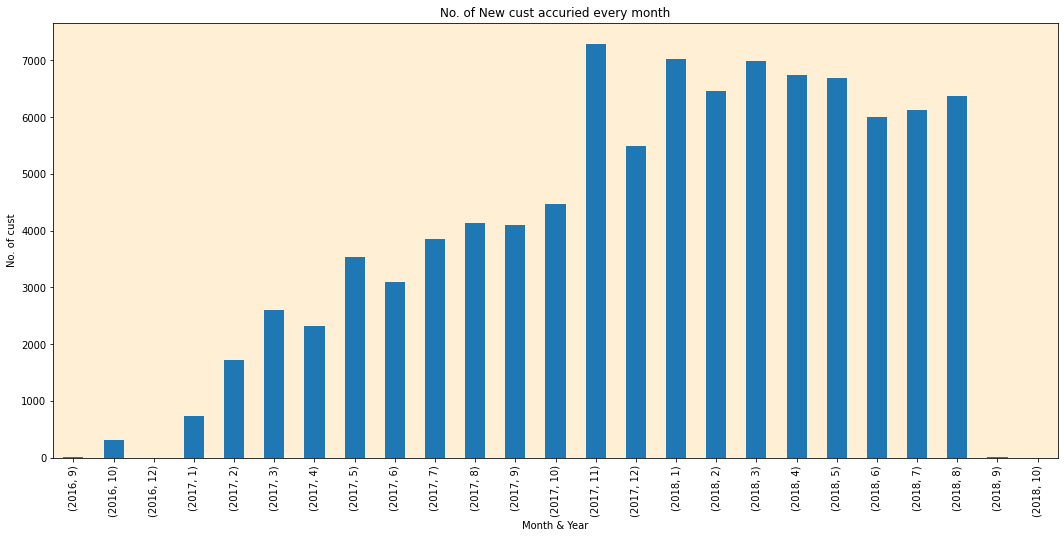

In [19]:
# Setting the background colour
ax = plt.axes()
ax.set_facecolor("papayawhip")
# Plotting the bar graph
New_cust.plot(kind='bar',figsize=(18,8))

plt.xlabel('Month & Year')
plt.ylabel('No. of cust')
plt.title("No. of New cust accuried every month")
plt.show()

#### Understand the retention of customers on month on month basis

In [20]:
# Merging the customer and order table under "Merger"
Merger = pd.merge(left=order_info,right=cust_info,how='inner',on='customer_id')

# Sorting the data by year & Month, then counting customer accuried every month under "cust"
cust = Merger.groupby(by=[Merger['order_purchase_timestamp'].dt.year,Merger['order_purchase_timestamp'].dt.month])['customer_unique_id'].count()

# Chnaging them into dataframe
pd.DataFrame(New_cust)
pd.DataFrame(cust)

# Joining both the datsets by concat under "final"
final = pd.concat([New_cust,cust],axis=1)

# setting the column names to "A" & "B"
final=final.set_axis(['A','B'],axis='columns')

# Getting the number of customer retained every month
final['Retained_cust'] = final['B'] - final['A']

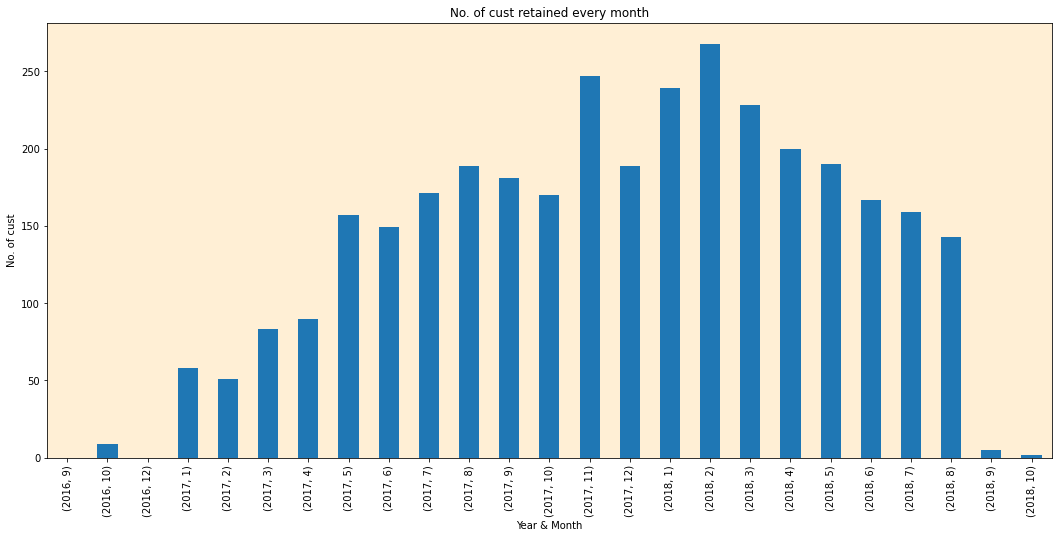

In [21]:
# Setting the background colour
ax = plt.axes()
ax.set_facecolor("papayawhip")
# Plotting the bar graph
final['Retained_cust'].plot(kind='bar',figsize=(18,8))

plt.xlabel('Year & Month')
plt.ylabel('No. of cust')
plt.title("No. of cust retained every month")
plt.show()

#### How the revenues from existing/new customers on month on month basis

In [22]:
# Merging the datasets under "xyz" 
xyz = pd.merge(left=payment_info,right=order_info,how='left',on='order_id')

# Dropping the columns that are not necessary
xyz.drop(
    columns=['payment_sequential','payment_type','payment_installments','order_status','order_approved_at',
             'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],inplace=True
        )

In [23]:
# Creating a function that will tag the customer as "New" or "Existing"
def tag_customers(df):
    

    # Sort the dataframe by transaction date
    df.sort_values('order_purchase_timestamp', inplace=True)

    # Create an empty list to store the customer types
    customer_types = []

    # Initialize a dictionary to store the last transaction date for each customer
    last_transaction_dates = {}

    # Loop through each row of the dataframe
    for index, row in df.iterrows():

        # Get the customer id and transaction date for the current row
        customer_id = row['customer_id']
        transaction_date = row['order_purchase_timestamp']

        # Check if the customer has made a transaction before
        if customer_id in last_transaction_dates:
            # Get the last transaction date for the customer
            last_transaction_date = last_transaction_dates[customer_id]

            # Check if the last transaction was in the same month as the current transaction
            if last_transaction_date.year == transaction_date.year and last_transaction_date.month == transaction_date.month:
                # The customer is an existing customer for this month
                customer_type = 'existing'
            else:
                # The customer is a new customer for this month
                customer_type = 'new'
        else:
            # The customer is a new customer for the first transaction
            customer_type = 'new'

        # Add the customer type to the list
        customer_types.append(customer_type)

        # Update the last transaction date for the customer
        last_transaction_dates[customer_id] = transaction_date

    # Add the customer types as a new column to the dataframe
    df['customer_type'] = customer_types

    return df


In [24]:
# applying the function on the desired dataset
tag_customers(xyz)

,order_id,payment_value,customer_id,order_purchase_timestamp,customer_type
27216,2e7a8482f6fb09756ca50c10d7bfc047,136.23,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,new
61536,e5fa5a7210941f7d56d0208e4e071d35,75.06,683c54fc24d40ee9f8a6fc179fd9856c,2016-09-05 00:15:00,new
58826,809a282bbd5dbcabb6f2f724fca862ec,40.95,622e13439d6b5a0b486c435618b2679e,2016-09-13 15:24:00,new
32924,71303d7e93b399f5bcd537d124c0bcfa,109.34,b106b360fe2ef8849fbbd056f777b4d5,2016-10-02 22:07:00,new
155,3b697a20d9e427646d92567910af6d57,45.46,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:00,new
...,...,...,...,...,...
95315,392ed9afd714e3c74767d0c4d3e3f477,137.03,2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:00,new
35636,616fa7d4871b87832197b2a137a115d2,80.38,bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:00,new
64016,a2ac6dad85cf8af5b0afb510a240fe8c,197.55,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:00,new
5106,b059ee4de278302d550a3035c4cdb740,222.03,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:00,new


In [25]:
# Sorting the values as needed & saving it under "abc"
abc = xyz.groupby(by=[xyz['order_purchase_timestamp'].dt.year,xyz['order_purchase_timestamp'].dt.month,'customer_type'])['payment_value'].sum()

# converting it to a dataframe under "pqr"
pqr = pd.DataFrame(abc)

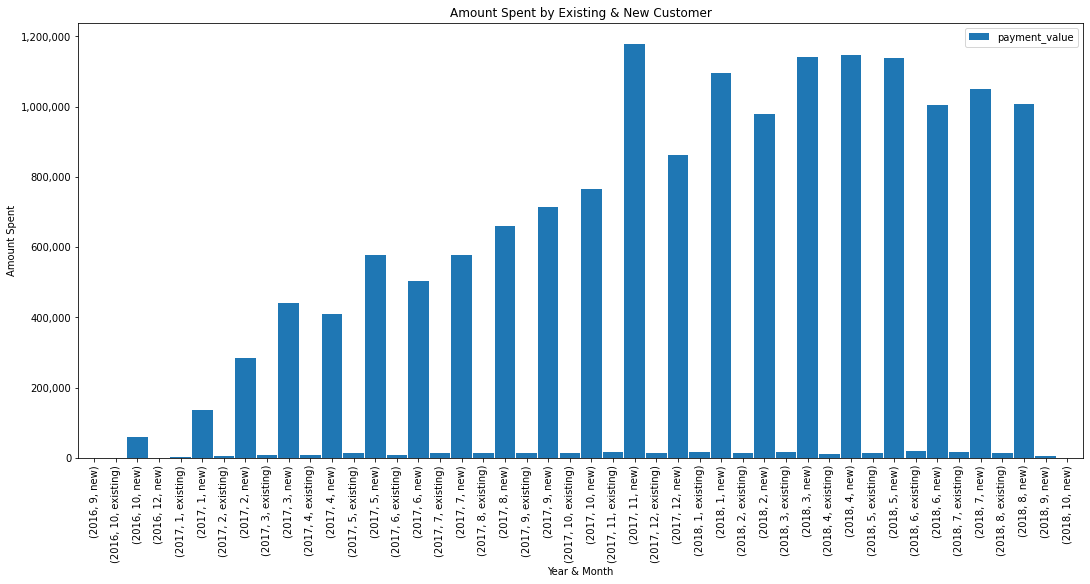

In [26]:
# Plotting the bar graph
fig = pqr.plot(kind='bar',figsize=(18,8),width=0.95)

y=['{:,.0f}'.format(x) for x in fig.get_yticks()]
fig.set_yticklabels(y)

plt.xlabel('Year & Month')
plt.ylabel('Amount Spent')
plt.title("Amount Spent by Existing & New Customer")
plt.show()

In [27]:
# Method 2 By using pivot table 

d = xyz.pivot_table(
    columns='customer_type',
    index=[xyz['order_purchase_timestamp'].dt.year,xyz['order_purchase_timestamp'].dt.month],
    values='payment_value',aggfunc='sum'
    )

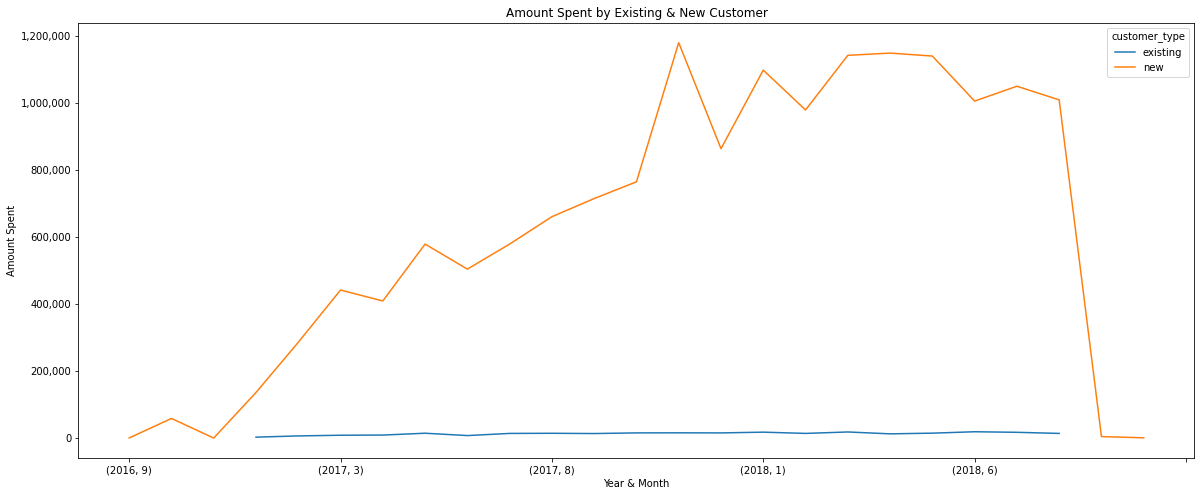

In [28]:
# Plotting using Line chart
fig = d.plot(kind='line',figsize=(20,8))

y=['{:,.0f}'.format(x) for x in fig .get_yticks()]
fig.set_yticklabels(y)

plt.xlabel('Year & Month')
plt.ylabel('Amount Spent')
plt.title("Amount Spent by Existing & New Customer")
plt.show()

#### Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

##### Revenue by Month

In [29]:
order_item['Total_price'] = order_item.price + order_item.freight_value

In [30]:
x = order_item.pivot_table(
    index= order_item['shipping_limit_date'].dt.month,
    values='Total_price', aggfunc='sum'
               ).reset_index()

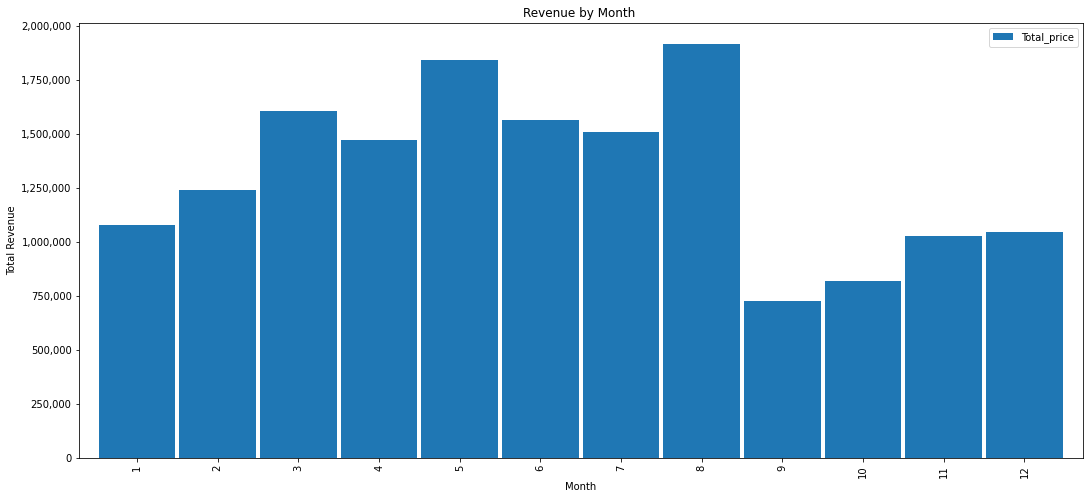

In [31]:
# Plotting the bar graph
fig = x.plot(
    kind='bar',x='shipping_limit_date',figsize=(18,8),width=0.95
    )


y=['{:,.0f}'.format(x) for x in fig .get_yticks()]
fig.set_yticklabels(y)


plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title("Revenue by Month ")


plt.show()

##### Quantity by category

In [32]:
# Merging the datasets & getting the desired information
qty_data = pd.merge(left=order_item,right=product_info,on='product_id',how='left')

grouped_data = qty_data.groupby(by='product_category_name')['order_id'].count().reset_index()

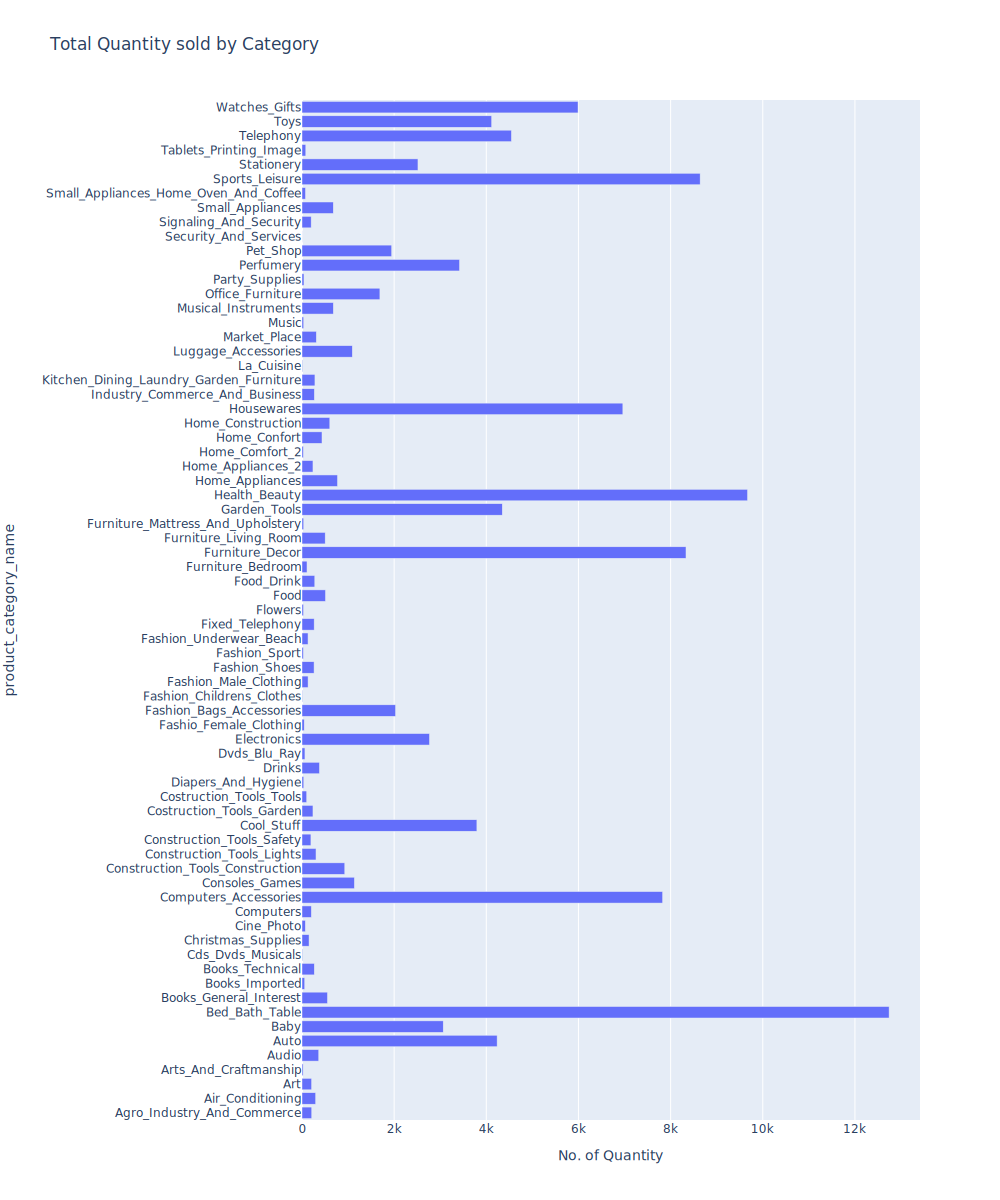

In [33]:
# Plotting the bar graph
plot = px.bar(
    grouped_data,x='order_id', y='product_category_name', title='Total Quantity sold by Category',
    width=1000,height=1200,orientation='h'
    )

plot.update_layout(xaxis_title='No. of Quantity',yaxis_title='product_category_name')

plot.show("svg")

##### Quantity by location

##### By City

In [34]:
# Merging the needed dataset
xyz = pd.merge(left=order_info,right=cust_info,on='customer_id',how='left')

In [35]:
# Grouping up the data by City & cust_id for "Top 100 cities by order placed"
uvw = xyz.groupby(by=['customer_state','customer_city'])['order_id'].count().reset_index().nlargest(100,columns='order_id')

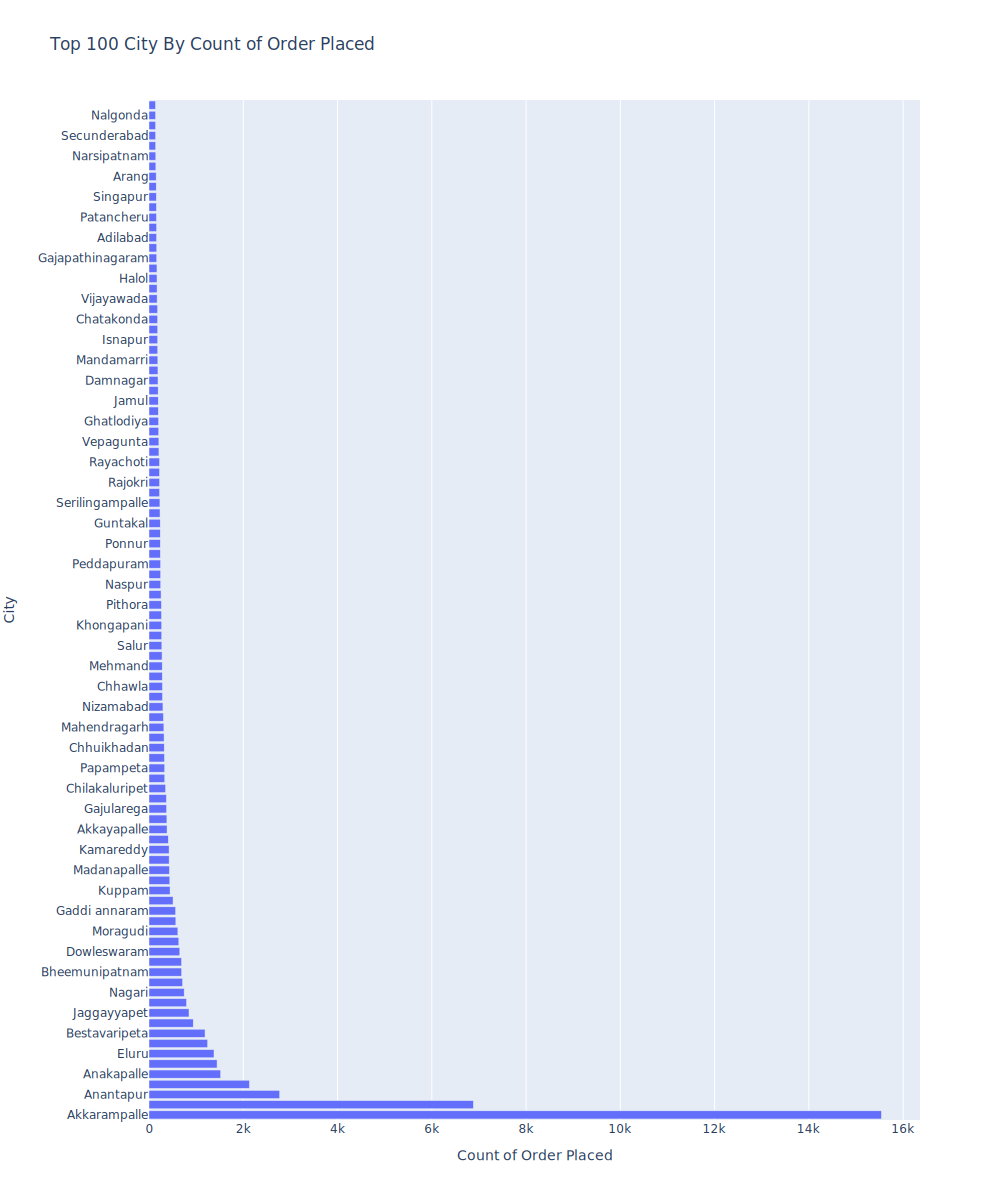

In [36]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    uvw,x='order_id', y='customer_city', title='Top 100 City By Count of Order Placed',
    width=1000,height=1200,orientation='h'
    )

plot.update_layout(xaxis_title='Count of Order Placed',yaxis_title='City')

plot.show("svg")

##### By State

In [37]:
# Grouping up the data by City & cust_id for "order placed by state"
pqr = xyz.groupby(by='customer_state')['order_id'].count().reset_index()

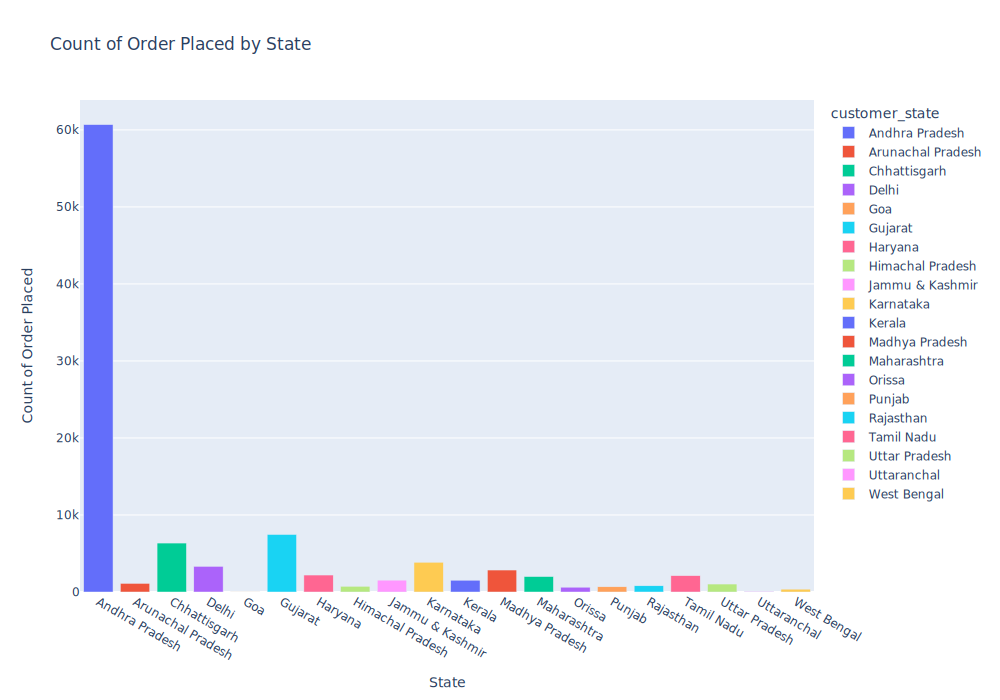

In [38]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    pqr,x = 'customer_state', y = 'order_id', title='Count of Order Placed by State',color='customer_state',
    width=1000,height=700
    )

plot.update_layout(xaxis_title='State',yaxis_title='Count of Order Placed')

plot.show("svg")

#### Revenue Generated by Days

In [39]:
# Grouping up the data by Day & Total Price for "Revenue Generated Day wise"
by_day = order_item.pivot_table(
    index= order_item['shipping_limit_date'].dt.day,
    values='Total_price', aggfunc='sum'
               ).reset_index()

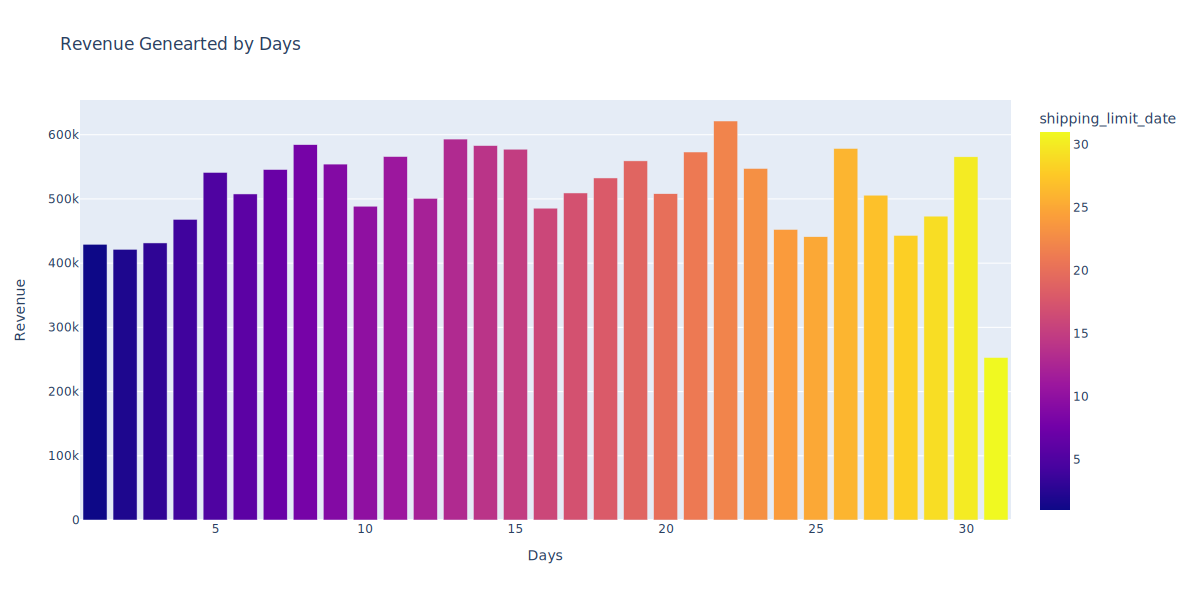

In [90]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    by_day,x = 'shipping_limit_date', y = 'Total_price', title='Revenue Genearted by Days',color='shipping_limit_date',
    width=1200,height=600
    )

plot.update_layout(xaxis_title='Days',yaxis_title='Revenue')

plot.show("svg")

#### Revenue Generated by Week

In [41]:
# Grouping up the data by Day & Total Price for "Revenue Generated Week wise"
by_week = order_item.pivot_table(
    index= [order_item['shipping_limit_date'].dt.year,order_item['shipping_limit_date'].dt.weekday],
    values='Total_price', aggfunc='sum'
    )

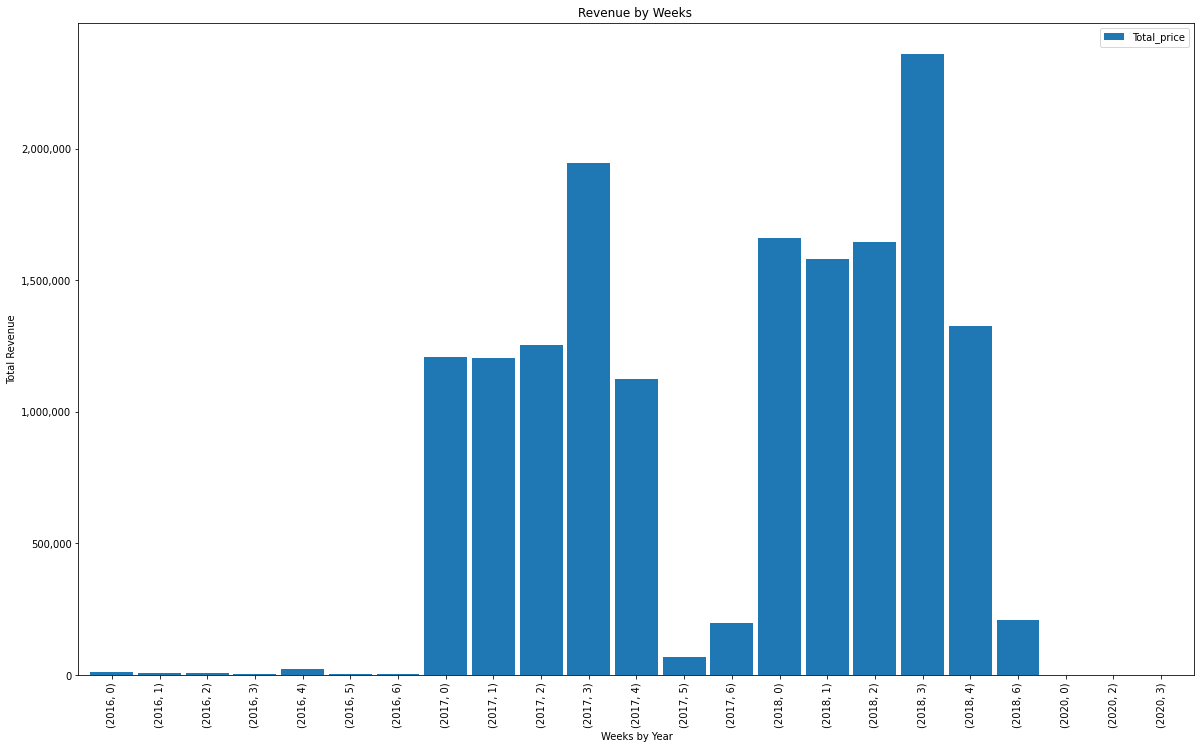

In [42]:
# plotting the above analyis in Bar Graph
fig = by_week.plot(
    kind='bar',figsize=(20,12),width=0.90
    )


y=['{:,.0f}'.format(x) for x in fig .get_yticks()]
fig.set_yticklabels(y)


plt.xlabel('Weeks by Year')
plt.ylabel('Total Revenue')
plt.title("Revenue by Weeks ")


plt.show()

#### Revenue Generated by Hour of Day

In [43]:
# Grouping up the data by Day & Total Price for "Revenue Generated By Hour of Day"
by_Hour = order_item.pivot_table(
    index= order_item['shipping_limit_date'].dt.hour,
    values='Total_price', aggfunc='sum'
    ).reset_index()

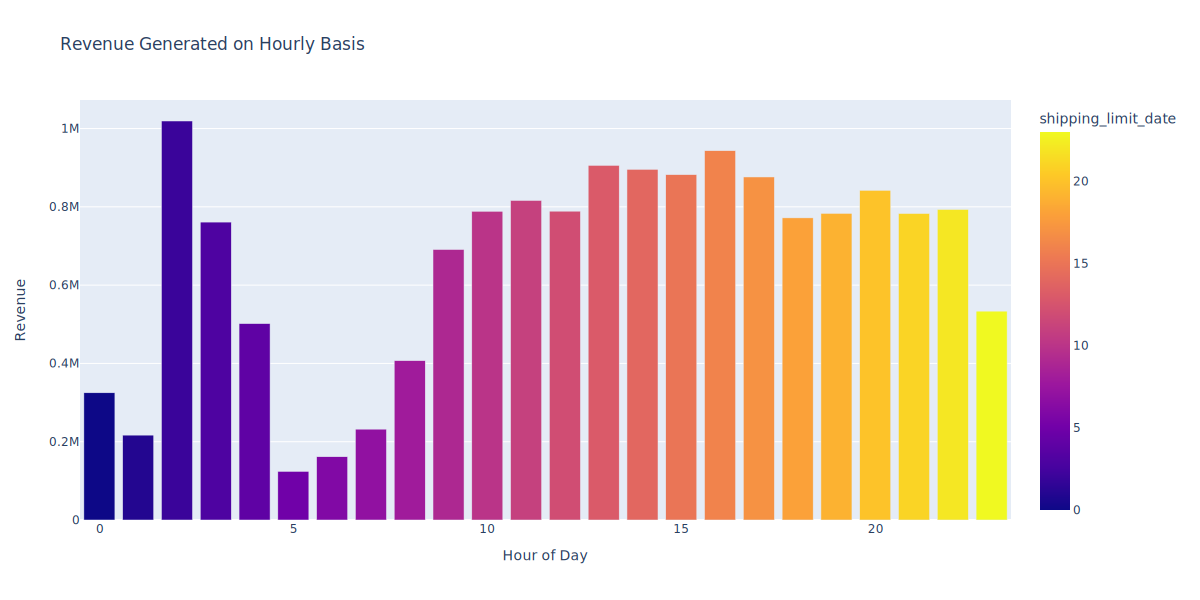

In [44]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    by_Hour,x = 'shipping_limit_date', y = 'Total_price', title='Revenue Generated on Hourly Basis',color='shipping_limit_date',
    width=1200,height=600
    )

plot.update_layout(xaxis_title='Hour of Day',yaxis_title='Revenue')

plot.show("svg")

#### By Channel and Payment Method

In [45]:
# Grouping up the data by payment channel & Total revenue for "Total Revenue by Payment Channel"
by_Channel = payment_info.pivot_table(
               index= payment_info['payment_type'],
               values='payment_value', aggfunc='sum'
                ).reset_index()

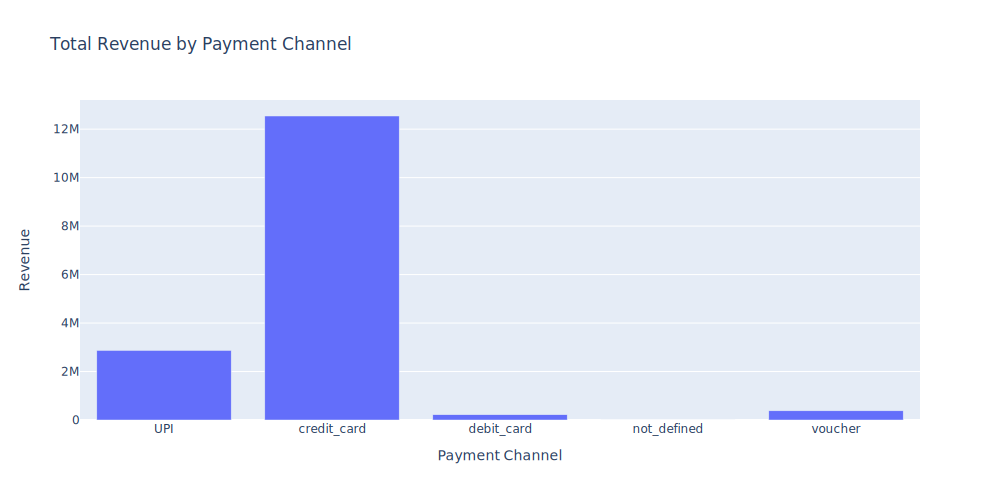

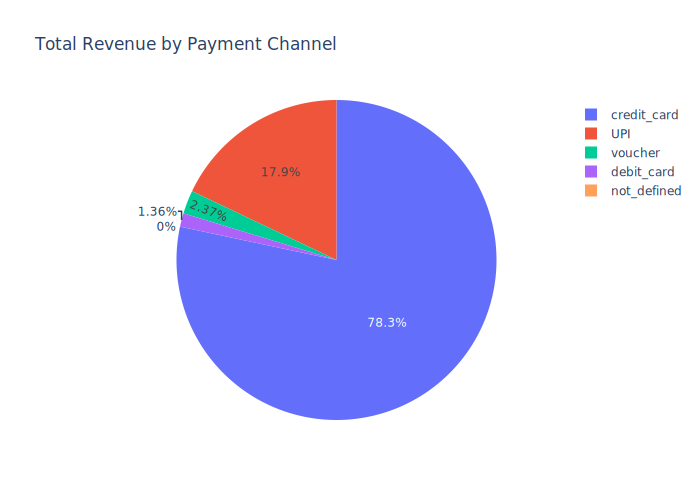

In [46]:
# plotting the above analyis in Bar Graph & Pie chart
plot = px.bar(
    by_Channel ,x = 'payment_type', y = 'payment_value', title='Total Revenue by Payment Channel',
    width=1000,height=500
    )

plot.update_layout(xaxis_title='Payment Channel',yaxis_title='Revenue')

plot.show("svg")

fig=px.pie(by_Channel,names='payment_type',values='payment_value',title='Total Revenue by Payment Channel')
fig.show("svg")

#### Popular Product by Month

In [47]:
# Merging the required Dataset
qty_data = pd.merge(left=order_item,right=product_info,on='product_id',how='left')

In [48]:
# Getting and sorting the data needed
pqr = qty_data.groupby(
        by=[qty_data['shipping_limit_date'].dt.month,'product_id']
        )['order_id'].count().reset_index()


abc = pqr.groupby('shipping_limit_date').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

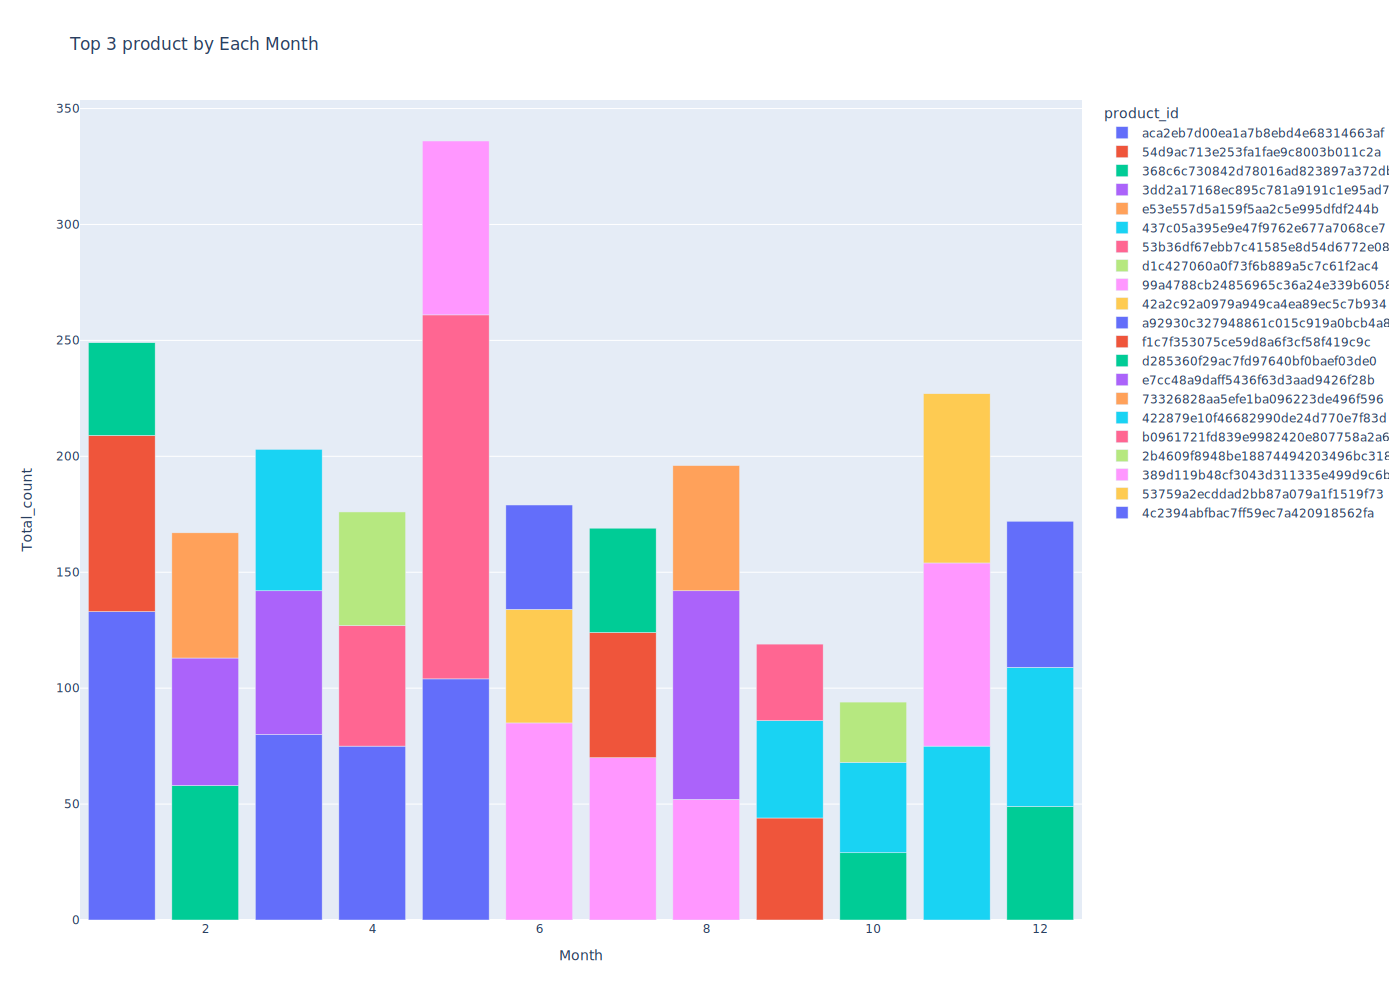

In [49]:
# plotting the above analyis in stacked Bar Graph
plot = px.bar(
    abc ,x = 'shipping_limit_date', y = 'order_id',color='product_id', title='Top 3 product by Each Month',
    width=1400,height=1000
    )

plot.update_layout(xaxis_title='Month',yaxis_title='Total_count')

plot.show("svg")

#### Popular Product by seller

In [50]:
# Getting and sorting the data needed
by_seller = order_item.groupby(
       by=['seller_id','product_id']
             )['order_id'].count().reset_index()

by_seller

,seller_id,product_id,order_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
3,001cca7ae9ae17fb1caed9dfb1094831,21fecd254a3103704126b28478ea7980,3
4,001cca7ae9ae17fb1caed9dfb1094831,4d7fee7877228c1497477ae53d97c214,2
...,...,...,...
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1
34444,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1


#### Popular Product by Month

In [51]:
prod_Month = order_item.groupby(
       by=[order_item['shipping_limit_date'].dt.month,'product_id']
             )['order_id'].count().reset_index()

In [52]:
pop_prod_Month = prod_Month.groupby(
        'shipping_limit_date').apply(lambda x: x.nlargest(3, 'order_id')
    ).reset_index(drop=True)

pop_prod_Month

,shipping_limit_date,product_id,order_id
0,1,aca2eb7d00ea1a7b8ebd4e68314663af,133
1,1,54d9ac713e253fa1fae9c8003b011c2a,76
2,1,368c6c730842d78016ad823897a372db,40
3,2,368c6c730842d78016ad823897a372db,58
4,2,3dd2a17168ec895c781a9191c1e95ad7,55
5,2,e53e557d5a159f5aa2c5e995dfdf244b,54
6,3,aca2eb7d00ea1a7b8ebd4e68314663af,80
7,3,3dd2a17168ec895c781a9191c1e95ad7,62
8,3,437c05a395e9e47f9762e677a7068ce7,61
9,4,aca2eb7d00ea1a7b8ebd4e68314663af,75


#### Popular Product by State

In [53]:
#Getting and sorting the data needed
prod_state = pd.merge(left=order_item,right=seller_info,on='seller_id',how='left')

pop_prod = prod_state.groupby(by=['seller_state','product_id'])['order_id'].count().reset_index()

pop_prod_state = pop_prod.groupby('seller_state').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

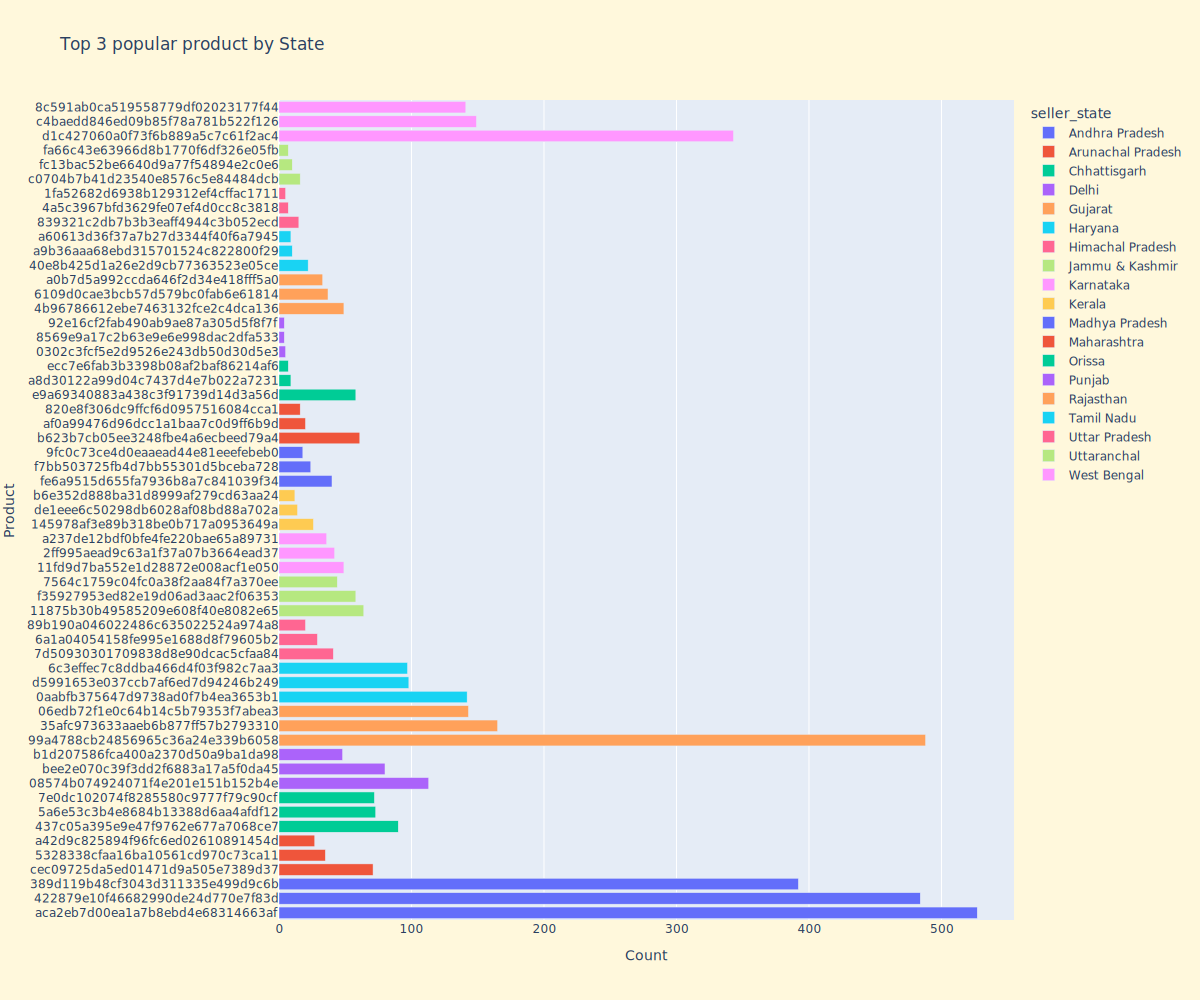

In [54]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    pop_prod_state ,x = 'order_id', y = 'product_id',color='seller_state', title='Top 3 popular product by State',
    width=1200,height=1000,orientation='h'
    )

plot.update_layout(xaxis_title='Count',yaxis_title='Product',paper_bgcolor = 'cornsilk')

plot.show("svg")

#### Popular Product by Product category

In [55]:
#Getting and sorting the data needed
prod_cat = pd.merge(left=order_item,right=product_info,on='product_id',how='left')


xyz = prod_cat.groupby(by=['product_category_name','product_id'])['order_id'].count().reset_index()


pop_prod_cat = xyz.groupby('product_category_name').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

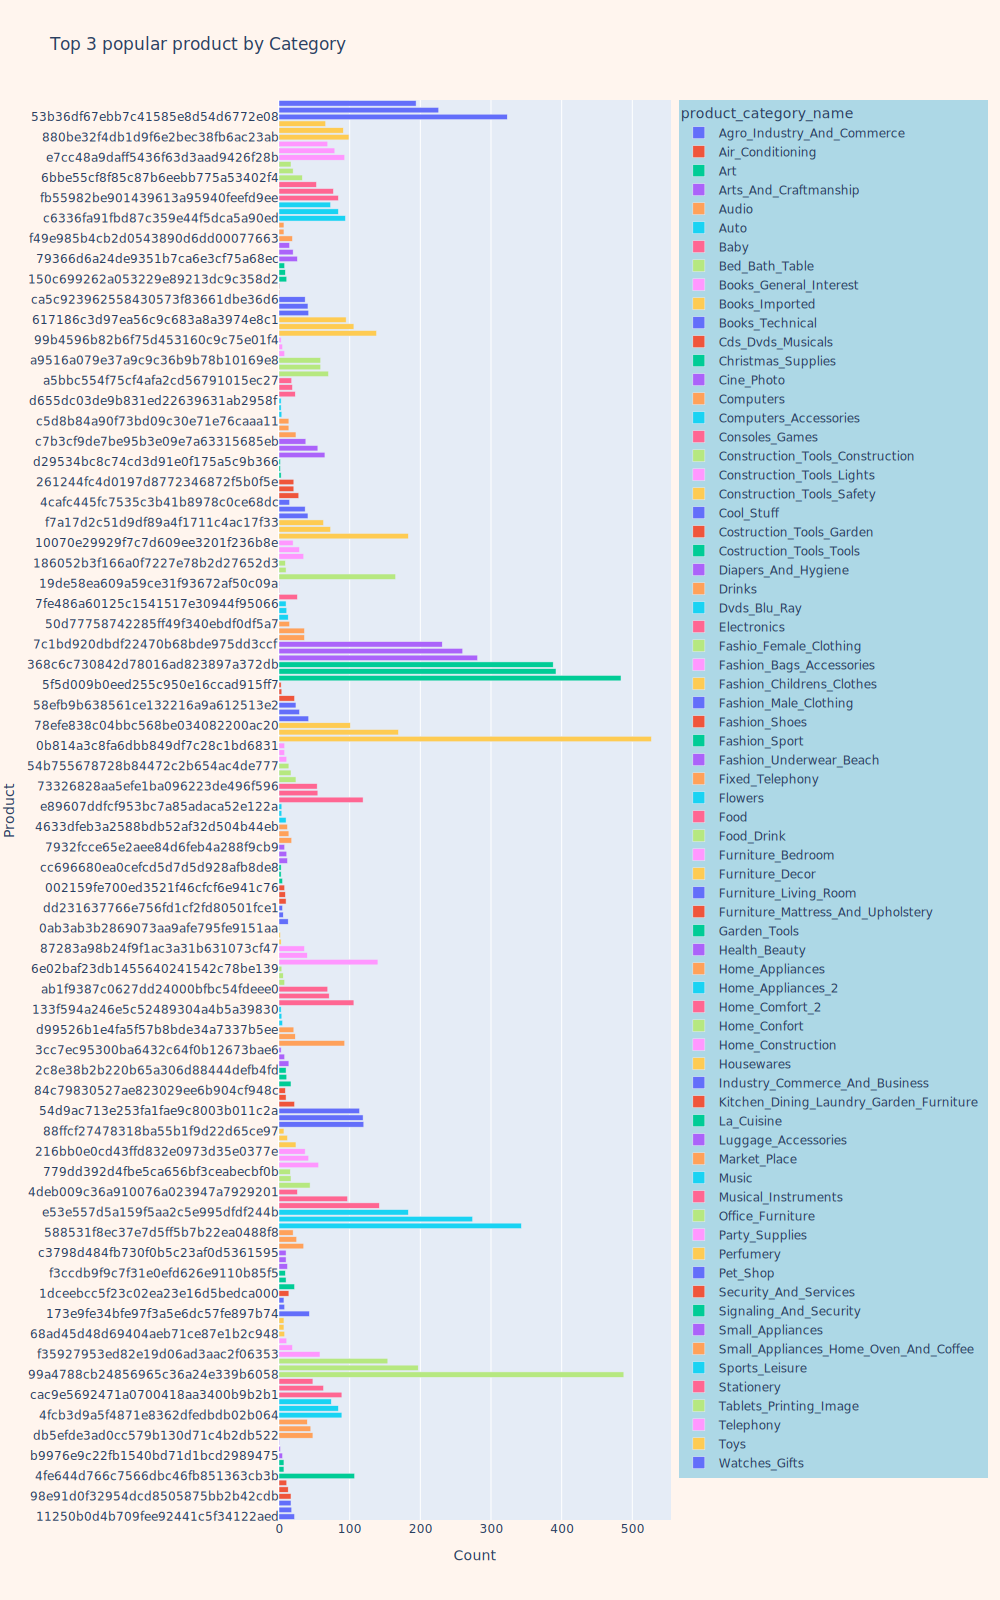

In [56]:
# plotting the above analyis in Bar Graph
fig = px.bar(
    pop_prod_cat, x="order_id", y="product_id", 
    color="product_category_name", title='Top 3 popular product by Category',
    width=1000,height=1600,orientation='h'
    )

fig.update_layout(xaxis_title='Count', yaxis_title='Product')
fig.update_layout(legend = dict(bgcolor = 'lightblue'),paper_bgcolor = 'seashell'
                  )



fig.show("svg")

#### Popular Categories by state

In [57]:
#Getting and sorting the data needed
a = pd.merge(left=prod_state,right=product_info,on='product_id',how='left')


a.drop(
    columns=['product_photos_qty','product_weight_g',
             'price','freight_value','Total_price','seller_zip_code_prefix',
             'product_name_lenght','product_description_lenght','product_length_cm','product_height_cm','product_width_cm'],
    inplace=True)


group_data = a.groupby(by=['seller_state','product_category_name'])['order_id'].count().reset_index()



pop_category = group_data.groupby('seller_state').apply(lambda x: x.nlargest(1, 'order_id')).reset_index(drop=True)

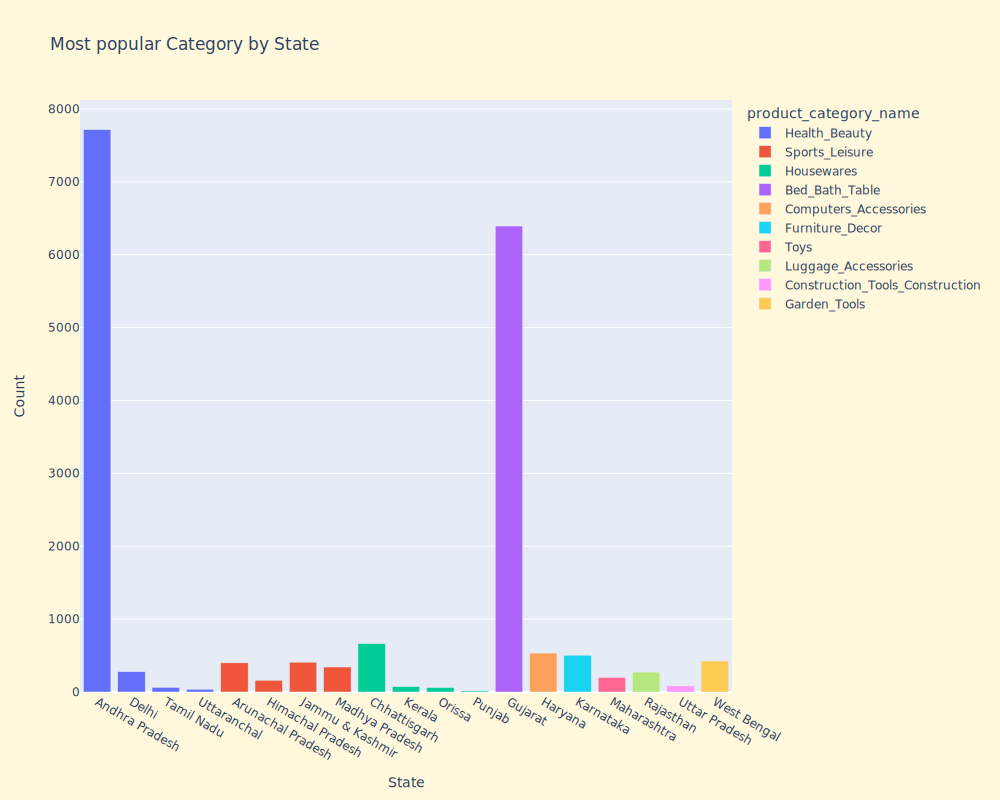

In [58]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    pop_category ,x = 'seller_state', y = 'order_id',color='product_category_name', title='Most popular Category by State',
    width=1000,height=800
    )

plot.update_layout(xaxis_title='State',yaxis_title='Count',paper_bgcolor = 'cornsilk')

plot.show("svg")

#### Popular Categories by Month

In [59]:
#Getting and sorting the data needed
by_month = a.groupby(by=[a['shipping_limit_date'].dt.month,'product_category_name'])['order_id'].count().reset_index()


Monthly = by_month.groupby('shipping_limit_date').apply(lambda x: x.nlargest(2, 'order_id')).reset_index(drop=True)

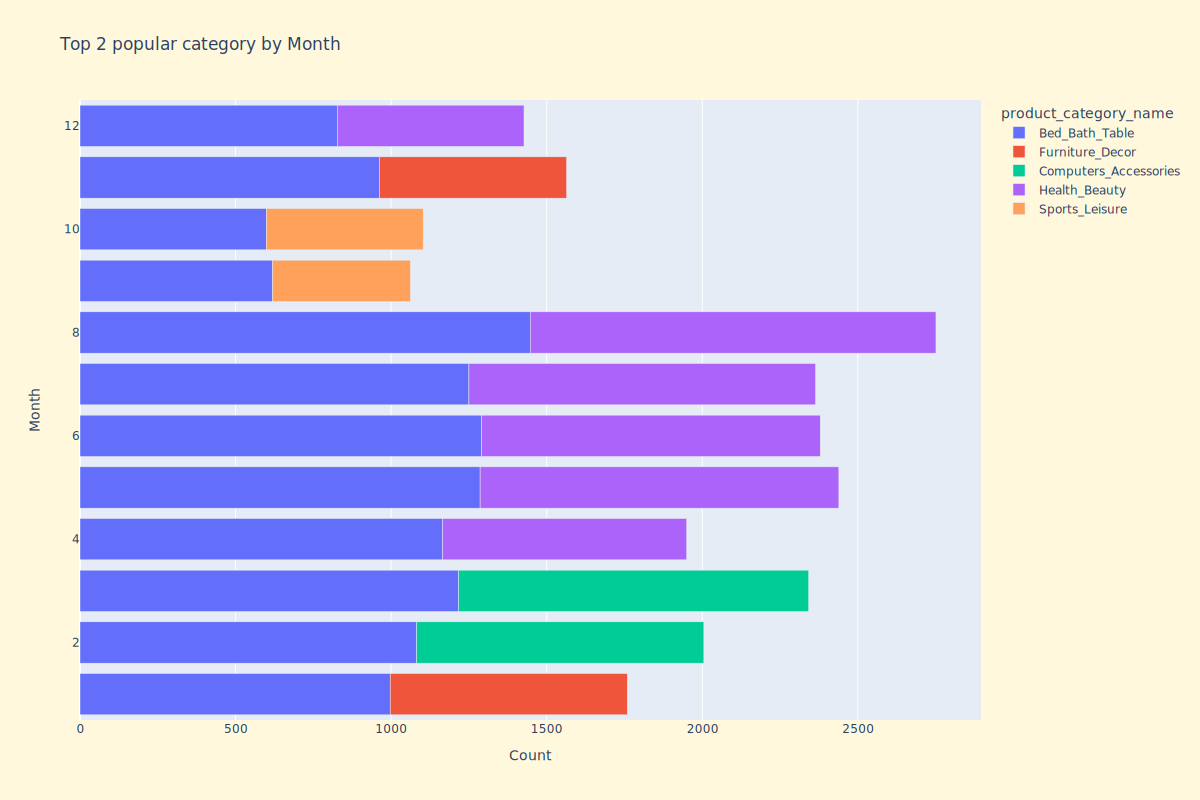

In [60]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Monthly ,x = 'order_id', y = 'shipping_limit_date',color='product_category_name', title='Top 2 popular category by Month',
    width=1200,height=800,orientation='h'
    )

plot.update_layout(xaxis_title='Count',yaxis_title='Month',paper_bgcolor = 'cornsilk')

plot.show("svg")

#### List top 10 most expensive products sorted by price

In [61]:
#Getting and sorting the data needed
For_Price = pd.merge(left=order_item,right=product_info,on='product_id',how='left')


For_Price.drop(
    columns=['freight_value','price','order_id','seller_id','shipping_limit_date',
             'order_item_id','product_name_lenght','product_description_lenght','product_photos_qty',
             'product_weight_g','product_length_cm','product_height_cm','product_width_cm'],
    inplace=True)


For_Price.groupby(by=['product_id','product_category_name'])['Total_price']


For_Price.nlargest(10,columns='Total_price').reset_index()

,index,product_id,Total_price,product_category_name
0,3556,489ae2aa008f021502940f251d4cce7f,6929.31,Housewares
1,112233,69c590f7ffc7bf8db97190b6cb6ed62e,6922.21,Computers
2,107841,1bdf5e6731585cf01aa8169c7028d6ad,6726.66,Art
3,74336,a6492cc69376c469ab6f61d8f44de961,4950.34,Small_Appliances
4,11249,c3ed642d592594bb648ff4a04cee2747,4764.34,Small_Appliances
5,62086,259037a6a41845e455183f89c5035f18,4681.78,Computers
6,29193,a1beef8f3992dbd4cd8726796aa69c53,4513.32,Musical_Instruments
7,56663,4ca7b91a31637bd24fb8e559d5e015e4,4194.76,Small_Appliances
8,45843,6cdf8fc1d741c76586d8b6b15e9eef30,4175.26,Consoles_Games
9,78310,dd113cb02b2af9c8e5787e8f1f0722f6,4163.51,Sports_Leisure


#### Divide the customers into groups based on the revenue generated

In [62]:
#Getting and sorting the data needed
segment = pd.merge(left=order_item,right=order_info,on='order_id',how='left')


segment.drop(
    columns=['order_item_id','seller_id','order_status','order_purchase_timestamp',
             'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],
    inplace=True)


seg_cust = segment.groupby(by='customer_id')['Total_price'].sum().reset_index()


bins = [0,2000,4000,6000,8000,10000,12000,14000]
labels = ['0 - 2000', '2000 - 4000', '4000 - 6000','6000 - 8000','8000 - 10000','10000 - 12000','12000 - 14000']
seg_cust['customer_seg']  = pd.cut(seg_cust.Total_price, bins, labels = labels,include_lowest = True)


plot_data = seg_cust.groupby(by= 'customer_seg')['customer_id'].count().reset_index()

plot_data

,customer_seg,customer_id
0,0 - 2000,98457
1,2000 - 4000,191
2,4000 - 6000,12
3,6000 - 8000,5
4,8000 - 10000,0
5,10000 - 12000,0
6,12000 - 14000,1


#### Divide the Sellers into groups based on the revenue generated

In [63]:
#Getting and sorting the data needed
segment = pd.merge(left=order_item,right=order_info,on='order_id',how='left')


segment.drop(
    columns=['order_item_id','customer_id','order_status','order_purchase_timestamp',
             'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],
    inplace=True)


seg_seller = segment.groupby(by='seller_id')['Total_price'].sum().reset_index()


bins = [0,50000,100000,150000,200000,250000]
labels = ['Poor', 'Fair', 'Good','Best','Excellent']
seg_seller['Seller_seg']  = pd.cut(seg_seller.Total_price, bins, labels = labels,include_lowest = True)


plot_data = seg_seller.groupby(by= 'Seller_seg')['seller_id'].count().reset_index()

plot_data

,Seller_seg,seller_id
0,Poor,3045
1,Fair,31
2,Good,8
3,Best,6
4,Excellent,5


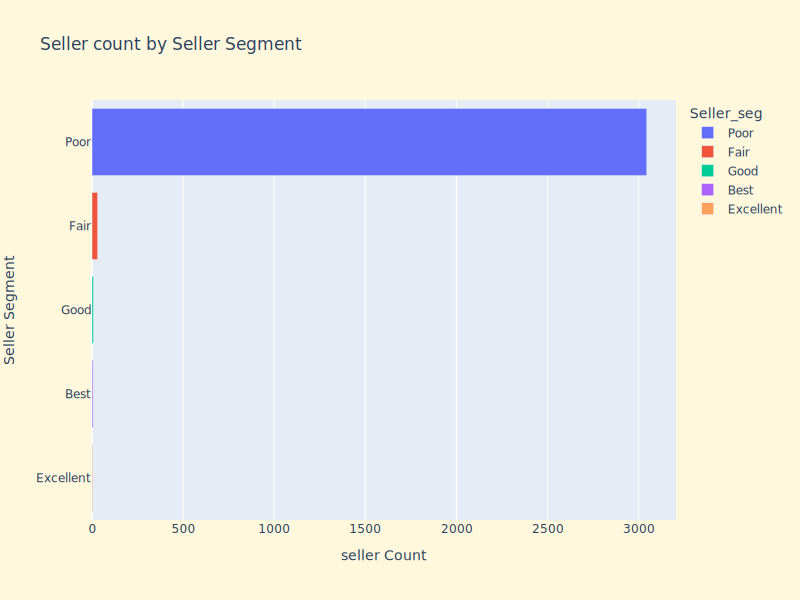

In [64]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    plot_data ,x = 'seller_id', y = 'Seller_seg',color='Seller_seg', title='Seller count by Seller Segment',
    width=800,height=600,orientation='h'
    )

plot.update_layout(xaxis_title='seller Count',yaxis_title='Seller Segment',paper_bgcolor = 'cornsilk')

plot.show("svg")

#### Cross-Selling (Which products are selling together)

##### Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [65]:
#Getting and sorting the data needed
D = pd.merge(left=order_item,right=product_info,on='product_id',how='left')


E = D[D['order_id'].duplicated(keep=False)]


E['Cat_Group'] = E.groupby(
    by='order_id')['product_category_name'].transform(
    lambda x : ' & '.join(map(str, x))
    )


E = E[['order_id','Cat_Group']].drop_duplicates()


F = E.groupby(by='Cat_Group').count().reset_index().sort_values('order_id',ascending=False).head(10)

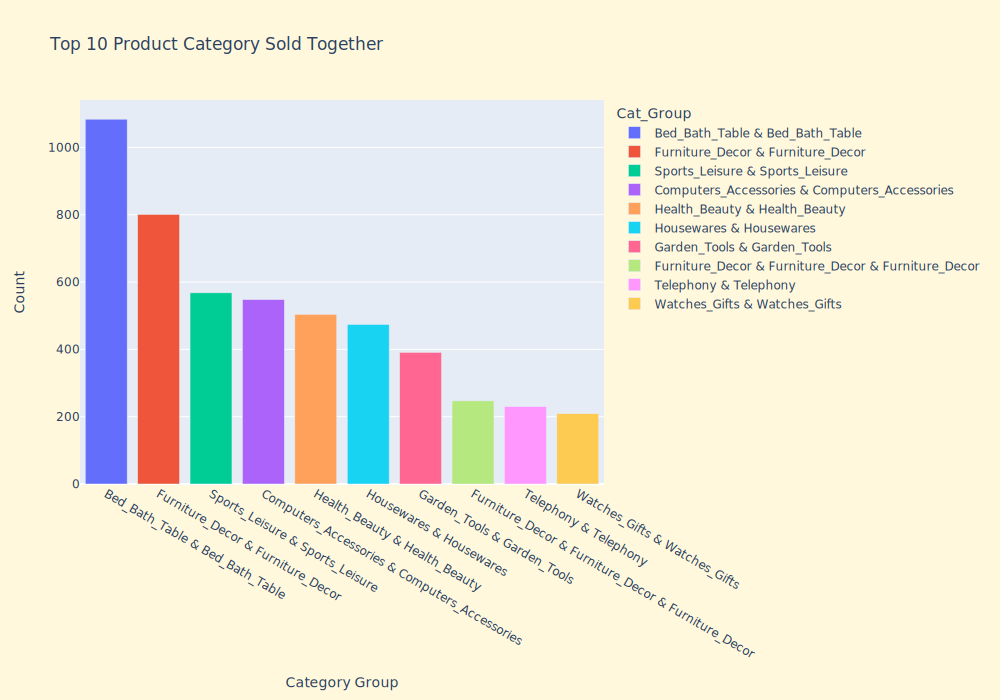

In [66]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    F ,x = 'Cat_Group', y = 'order_id',color='Cat_Group', title='Top 10 Product Category Sold Together',
    width=1000, height=700,
    )

plot.update_layout(xaxis_title='Category Group',yaxis_title='Count',paper_bgcolor = 'cornsilk')

plot.show("svg")

#### How customers are paying?

In [67]:
#Getting and sorting the data needed
H = payment_info.groupby(by='payment_installments')['order_id'].count().reset_index()

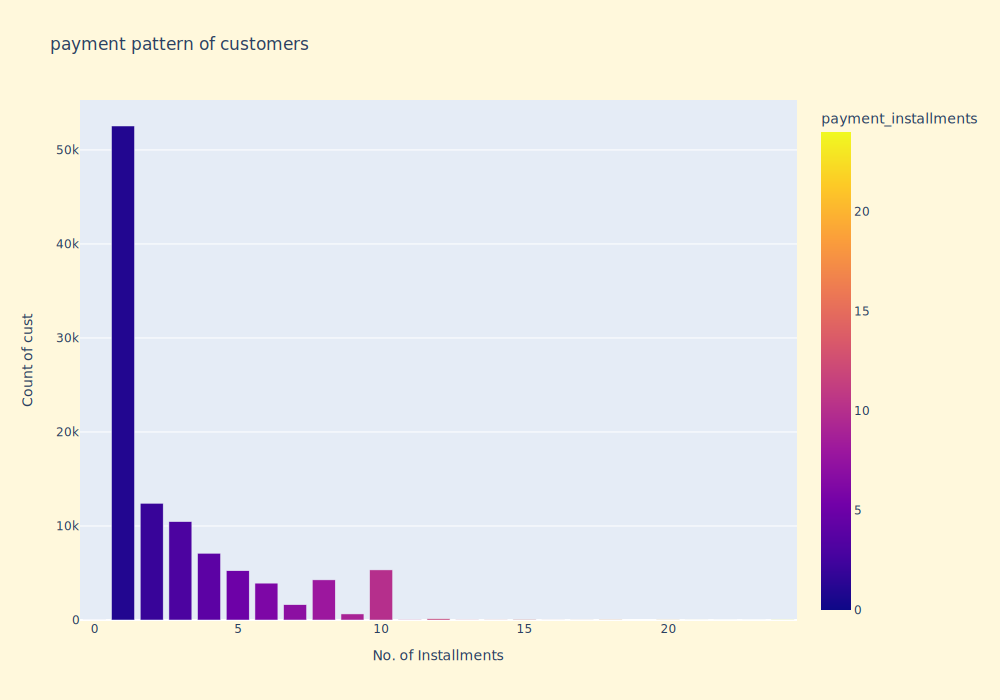

In [68]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    H ,x = 'payment_installments', y = 'order_id',color='payment_installments', title='payment pattern of customers',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='No. of Installments',yaxis_title='Count of cust',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

#### Which payment channels are used by most customers?

In [69]:
#Getting and sorting the data needed
H = payment_info.groupby(by='payment_type')['order_id'].count().reset_index()

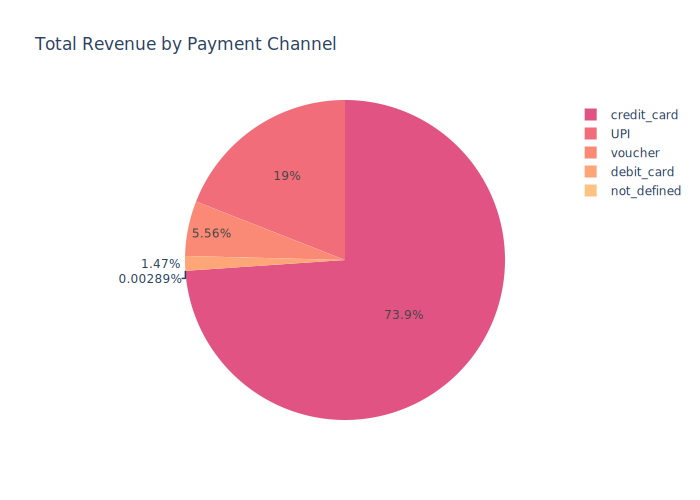

In [70]:
# plotting the above analyis in Pie Chart
fig=px.pie(H,
           names='payment_type',values='order_id',
           title='Total Revenue by Payment Channel',color_discrete_sequence=px.colors.sequential.Pinkyl_r
           )

fig.show("svg")

#### Which categories (top 10) are maximum rated & minimum rated?

In [71]:
#Getting and sorting the data needed
G = pd.merge(left=order_item,right=product_info,on='product_id',how='left')


J = pd.merge(left=G,right=ratings,on='order_id',how='left')


J.drop(
    columns=['order_item_id','seller_id', 'price', 
             'freight_value', 'Total_price', 'product_name_lenght','product_description_lenght', 
             'product_photos_qty', 'product_weight_g','product_length_cm',
               'product_height_cm', 'product_width_cm','review_answer_timestamp','review_creation_date'],
               inplace=True
    )


J = J.drop_duplicates(subset='review_id',keep='first')

J = J.dropna(axis=0)

##### Top 10 by Max ratings

In [72]:
#Getting and sorting the data needed
prod_Max_Rating = J.loc[J['review_score'] == 5]


Top_10 = prod_Max_Rating.groupby(
    by=['product_category_name'])['review_score'].count().reset_index().sort_values(
    'review_score',ascending=False
    ).head(10)

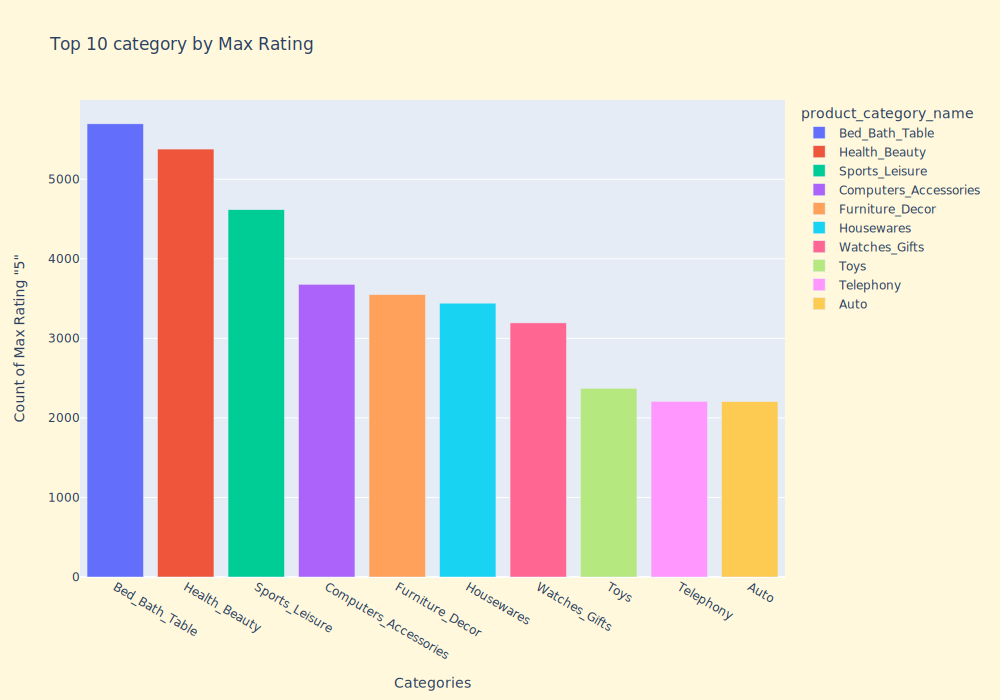

In [73]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Top_10 ,x = 'product_category_name', y = 'review_score',color='product_category_name', title='Top 10 category by Max Rating',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='Categories',yaxis_title='Count of Max Rating "5" ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

##### Top 10 by Min ratings

In [74]:
#Getting and sorting the data needed
prod_Min_Rating = J.loc[J['review_score'] == 1]


Bottom_10 = prod_Min_Rating.groupby(
    by=['product_category_name'])['review_score'].count().reset_index().sort_values(
    'review_score',ascending=False
    ).head(10)

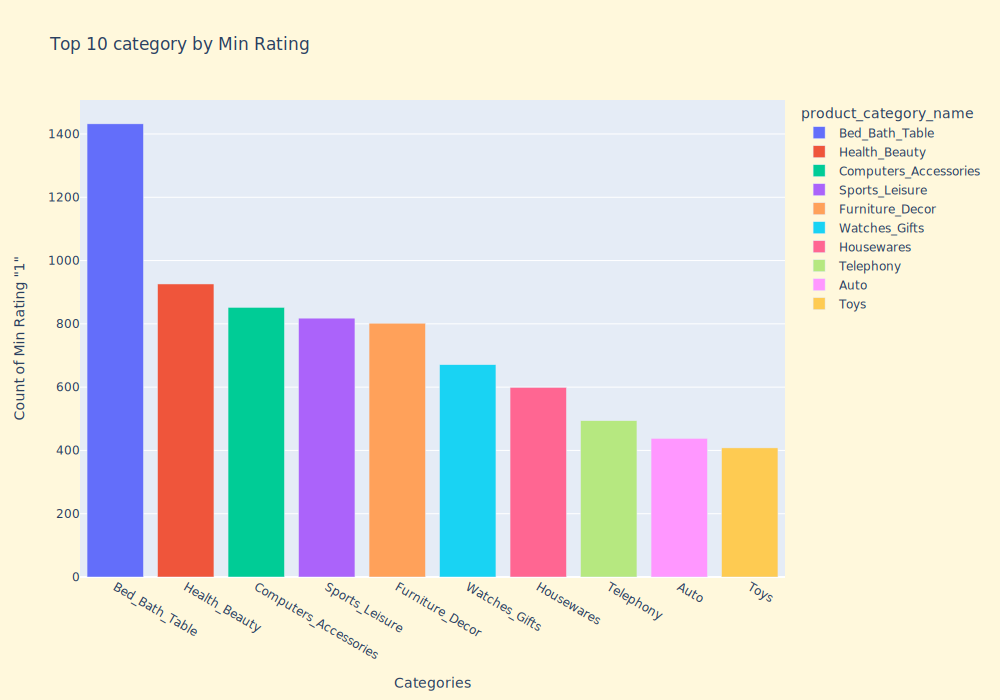

In [75]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Bottom_10 ,x = 'product_category_name', y = 'review_score',color='product_category_name', title='Top 10 category by Min Rating',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='Categories',yaxis_title='Count of Min Rating "1" ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

#### Which products (top10) are maximum rated & minimum rated?

##### Top 10 by Max Ratings

In [76]:
#Getting and sorting the data needed
Max_prod_Rating = J.loc[J['review_score'] == 5]


Top_10 = Max_prod_Rating.groupby(
    by=['product_id'])['review_score'].count().reset_index().sort_values(
    'review_score',ascending=False
    ).head(10)

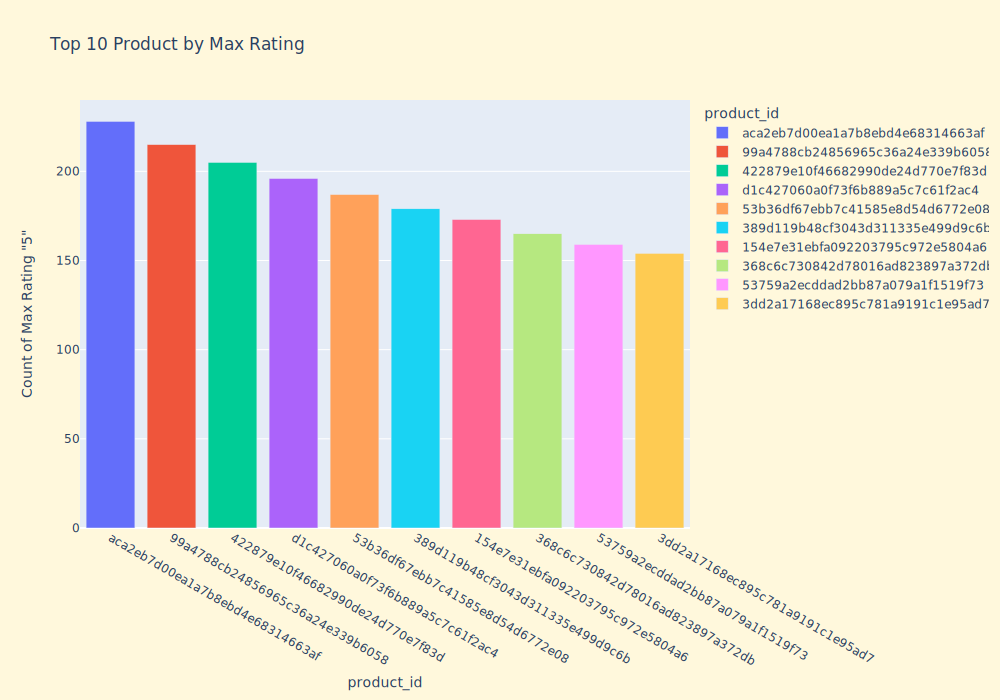

In [77]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Top_10 ,x = 'product_id', y = 'review_score',color='product_id', title='Top 10 Product by Max Rating',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='product_id',yaxis_title='Count of Max Rating "5" ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

##### Top 10 by Min Ratings

In [78]:
#Getting and sorting the data needed
Min_prod_Rating = J.loc[J['review_score'] == 1]


Lowest_10 = Min_prod_Rating.groupby(
    by=['product_id'])['review_score'].count().reset_index().sort_values(
    'review_score',ascending=False
    ).head(10)

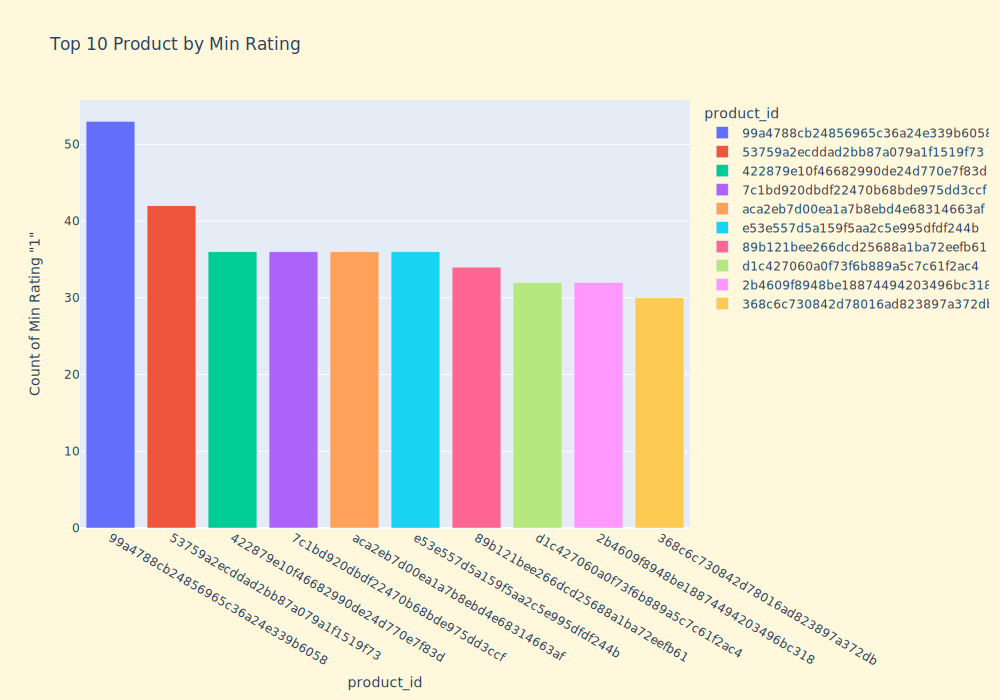

In [79]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Lowest_10 ,x = 'product_id', y = 'review_score',color='product_id', title='Top 10 Product by Min Rating',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='product_id',yaxis_title='Count of Min Rating "1" ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

#### Average rating by location, seller, product, category, month etc.

##### Average Ratings by Location

###### By City

In [80]:
#Getting and sorting the data needed
L = pd.merge(left=order_info,right=cust_info,on='customer_id',how='left')


N = pd.merge(left=L,right=ratings,on='order_id',how='left')


N.drop(
    columns=[ 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
             'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix',
             'review_answer_timestamp'],
             inplace=True
    )

In [81]:
#Getting and sorting the data needed
P = N.groupby(by='customer_city')['review_score'].mean().reset_index().sort_values(by='customer_city')

P.rename(columns={'customer_city':'City', 'review_score':'Avg_review'}, inplace =True)

P

,City,Avg_review
0,Aadityana,3.684211
1,Aambaliyasan,3.500000
2,Aantaliya,4.000000
3,Aarambhada,3.772727
4,Abiramam,5.000000
...,...,...
4114,Zamin Uthukuli,4.000000
4115,Ziauddin Pur,4.014184
4116,Zira,4.500000
4117,Zirakpur,4.500000


###### By State

In [82]:
#Getting and sorting the data needed
Q = N.groupby(by='customer_state')['review_score'].mean().reset_index().sort_values(by='customer_state')

Q.rename(columns={'customer_state':'State', 'review_score':'Avg_review'}, inplace =True)

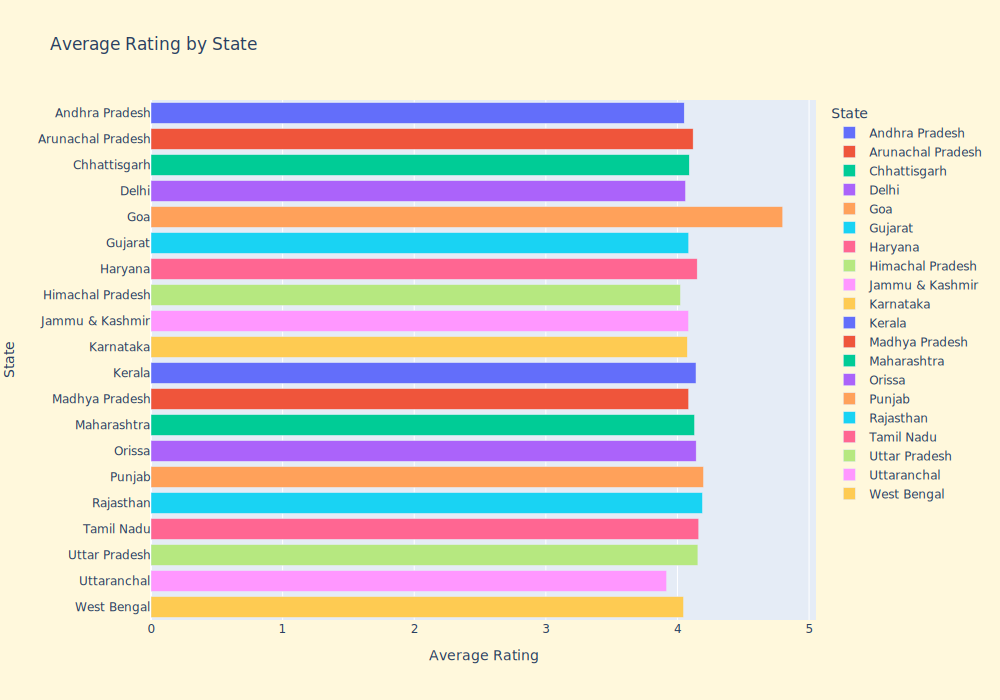

In [83]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Q ,x = 'Avg_review', y = 'State',color='State', title='Average Rating by State',
    width=1000, height=700,orientation='h'
    )

plot.update_layout(
    xaxis_title='Average Rating',yaxis_title='State',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

##### Average Ratings by Seller

In [84]:
#Getting and sorting the data needed
O = pd.merge(left=order_item,right=ratings,on='order_id',how='left')

W = O.groupby(by='seller_id')['review_score'].mean().reset_index()

W.rename(columns={'customer_state':'State', 'review_score':'Avg_review'}, inplace =True)

W

,seller_id,Avg_review
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246


##### Average Ratings by Product

In [85]:
#Getting and sorting the data needed
S = pd.merge(left=order_item,right=product_info,on='product_id',how='left')

T = pd.merge(left=S ,right=ratings,on='order_id',how='left')

T.drop(
    columns=['order_id', 'order_item_id','seller_id','price', 'freight_value', 'Total_price','shipping_limit_date',
             'product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
             'product_length_cm', 'product_height_cm', 'product_width_cm','review_creation_date'],
             inplace=True
)

U = T.groupby(by='product_id')['review_score'].mean().reset_index()

U.rename(columns={'product_id':'Product', 'review_score':'Avg_review'}, inplace =True)

U

,Product,Avg_review
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


##### Average Ratings by Category

In [86]:
#Getting and sorting the data needed
V = T.groupby(by='product_category_name')['review_score'].mean().reset_index()

V.rename(columns={'product_category_name':'Category', 'review_score':'Avg_review'}, inplace =True)

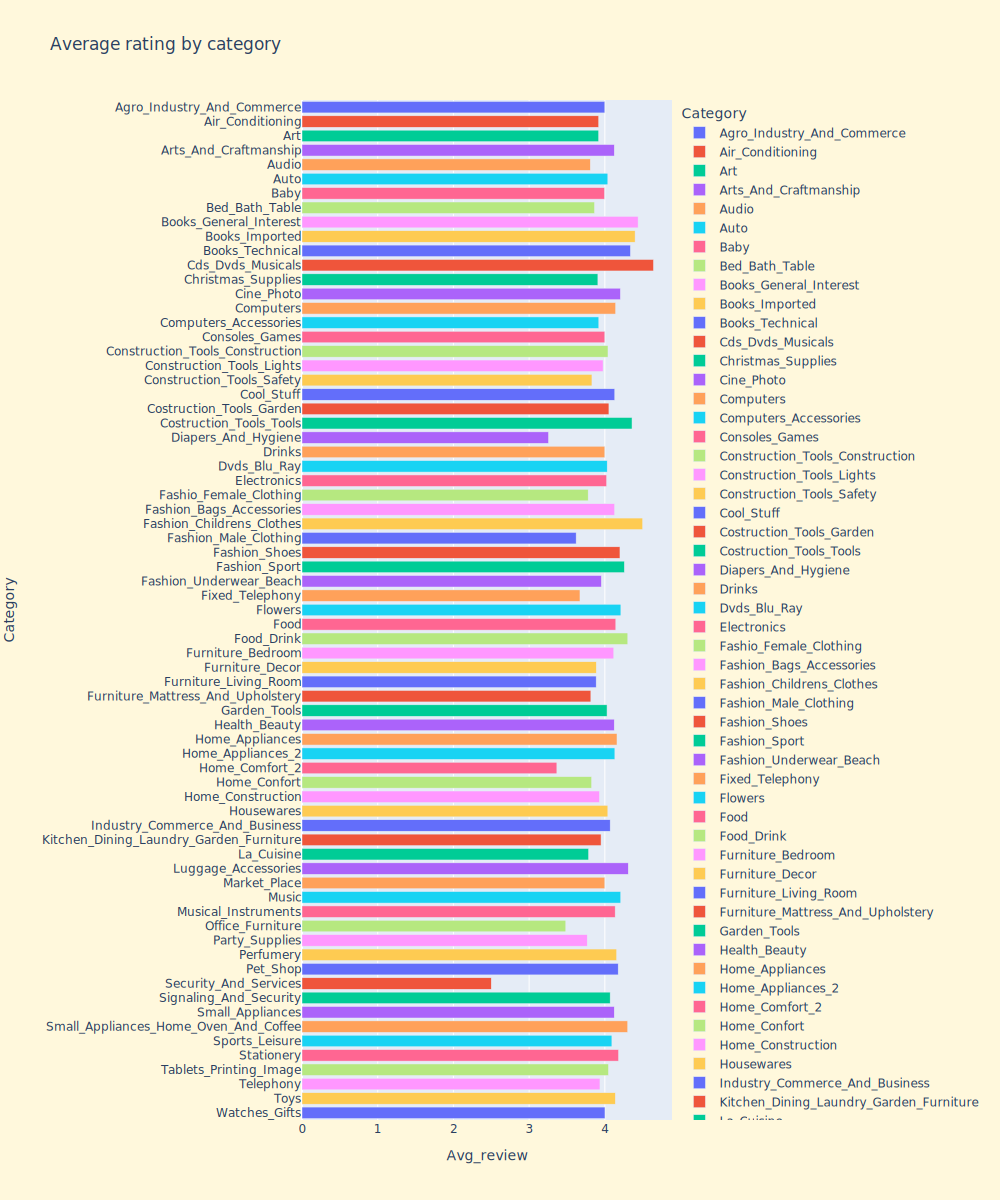

In [87]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    V ,x = 'Avg_review', y = 'Category',color='Category', title='Average rating by category',
    width=1000, height=1200,
    )

plot.update_layout(
    xaxis_title='Avg_review',yaxis_title='Category ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")

##### Average Ratings by Month

In [88]:
#Getting and sorting the data needed
Z = T.groupby(by=T['review_answer_timestamp'].dt.month)['review_score'].mean().reset_index()

Z.rename(columns={'review_answer_timestamp':'Month', 'review_score':'Avg_review'}, inplace =True)

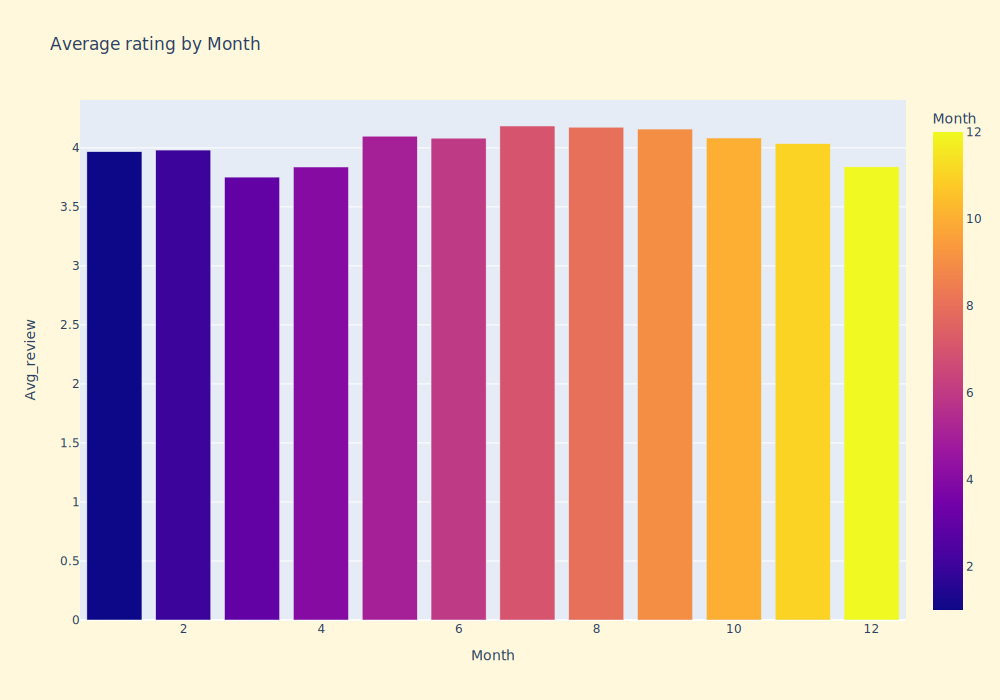

In [89]:
# plotting the above analyis in Bar Graph
plot = px.bar(
    Z ,x = 'Month', y = 'Avg_review',color='Month', title='Average rating by Month',
    width=1000, height=700,
    )

plot.update_layout(
    xaxis_title='Month',yaxis_title='Avg_review ',
    paper_bgcolor = 'cornsilk'
    )

plot.show("svg")